OBJ:
* Demo smooth pipeline for complete ML model.

In [1]:
import pandas as pd
import numpy as np

## Load data

In [2]:
from src.data.io import import_and_prep_target_df_from_pickle, import_and_merge_feature_dfs_from_pickles

In [3]:
df = import_and_prep_target_df_from_pickle('./../../../data/interim/D3_dailyTS/EDdaily_occupancy_classRollQ90_clipped.pkl')

df.head()

,flag_target,EDMeanOcc_prevday
dt_date,,
2011-09-01,0,NaN
2011-09-02,0,28.000000
2011-09-03,0,36.833333
2011-09-04,0,29.291667
2011-09-05,0,36.833333


In [4]:
df.shape

(2587, 2)

In [5]:
pickle_features_list = ['callender.pkl', 'EDmorn.pkl', 'IPmorn.pkl', 'IPprevday_summary.pkl', 'EDprevday_summary.pkl']
df2 = import_and_merge_feature_dfs_from_pickles('./../../../data/interim/D3_dailyTS/', pickle_features_list, df)
df2.head()

,flag_target,EDMeanOcc_prevday,year,month,holiday,christmas_period,Friday,Monday,Saturday,Sunday,...,IPDAILYno_patients_nonelec,IPDAILYno_patients_elec,IPDAILYno_patients_daycase,IPDAILYage_mean_elecnonelec,IPDAILYno_age_75plus_elecnonelec,EDDAILYno_attendances,EDDAILYno_admissions,EDDAILYage_mean,EDDAILYno_age_75plus,EDDAILYno_attendances_ambulance
dt_date,,,,,,,,,,,,,,,,,,,,,
2011-09-01,0,NaN,2011,9,0,0,0.0,0.0,0.0,0.0,...,898,221,203,63.4048,443,193,83,46.7513,32,68
2011-09-02,0,28.000000,2011,9,0,0,1.0,0.0,0.0,0.0,...,901,238,221,63.5031,446,213,99,48.6761,35,89
2011-09-03,0,36.833333,2011,9,0,0,0.0,0.0,1.0,0.0,...,892,227,182,63.3021,437,215,100,49.107,40,91
2011-09-04,0,29.291667,2011,9,0,0,0.0,0.0,0.0,1.0,...,859,176,53,63.9923,418,251,124,47.8247,43,114
2011-09-05,0,36.833333,2011,9,0,0,0.0,1.0,0.0,0.0,...,852,161,38,64.2655,415,273,114,47.4908,44,107


In [6]:
for i in df2:
    print(i)

flag_target
EDMeanOcc_prevday
year
month
holiday
christmas_period
Friday
Monday
Saturday
Sunday
Thursday
Tuesday
Wednesday
EDMORNoccupancy
EDMORNage_mean
EDMORNocc_age_75plus
EDMORNocc_ambulance
EDMORNocc_majors
EDMORNocc_minors
EDMORNocc_resus
EDMORNocc_mmrother
IPMORNocc_patients_total
IPMORNocc_patients_nonelec
IPMORNocc_patients_elec
IPMORNocc_patients_daycase
IPMORNage_mean_elecnonelec
IPMORNocc_age_75plus_elecnonelec
IPMORNocc_patients_elecnonelec_gp
IPMORNocc_patients_elecnonelec_ed
IPDAILYno_patients_total
IPDAILYno_patients_nonelec
IPDAILYno_patients_elec
IPDAILYno_patients_daycase
IPDAILYage_mean_elecnonelec
IPDAILYno_age_75plus_elecnonelec
EDDAILYno_attendances
EDDAILYno_admissions
EDDAILYage_mean
EDDAILYno_age_75plus
EDDAILYno_attendances_ambulance


### Create lagged and deriv vars 

In [7]:
df2.EDMeanOcc_prevday[-100:].plot()
df2.EDMeanOcc_prevday.rolling(30).mean()[-100:].plot()

In [8]:
def generate_rolling_features(df, col_name):
    "Makes new df with aditional rolling features from column given as str in col_name."
    df_new = df.copy()
    df_new[col_name + '_rollmean30'] = df_new[col_name].rolling(30).mean()
    df_new[col_name + '_rollmean14'] = df_new[col_name].rolling(14).mean()
    df_new[col_name + '_rollmean7'] = df_new[col_name].rolling(7).mean()
    df_new[col_name + '_rollmean3'] = df_new[col_name].rolling(3).mean()
    df_new[col_name + '_rollmean1'] = df_new[col_name].rolling(1).mean()
    return(df_new)

# df2 = generate_rolling_features(df2, 'EDMeanOcc_prevday')

In [9]:
def generate_deriv_features(df, col_name):
    "Mkaes new df with additional features which are derivities from column given as str in col_name.  "
    df_new = df.copy()
    df_new[col_name + '_deriv30'] = df_new[col_name].rolling(30).mean().diff(30)
    df_new[col_name + '_deriv14'] = df_new[col_name].rolling(14).mean().diff(14)
    df_new[col_name + '_deriv7'] = df_new[col_name].rolling(7).mean().diff(7)
    df_new[col_name + '_deriv3'] = df_new[col_name].rolling(3).mean().diff(3)
    df_new[col_name + '_deriv3'] = df_new[col_name].rolling(3).mean().diff(1)
    # adding these new derivitives seems not to make much differenece
#     df_new[col_name + '_deriv30'] = df_new[col_name].rolling(30).mean().diff(1) 
#     df_new[col_name + '_deriv14'] = df_new[col_name].rolling(14).mean().diff(1)
#     df_new[col_name + '_deriv7'] = df_new[col_name].rolling(7).mean().diff(1)
#     df_new[col_name + '_deriv3'] = df_new[col_name].rolling(3).mean().diff(1)
    return(df_new)

df2 = generate_deriv_features(df2, 'EDMeanOcc_prevday')
df2 = generate_deriv_features(df2, 'EDDAILYno_admissions')
df2 = generate_deriv_features(df2, 'IPDAILYno_patients_nonelec')


In [10]:
df2.head()

,flag_target,EDMeanOcc_prevday,year,month,holiday,christmas_period,Friday,Monday,Saturday,Sunday,...,EDMeanOcc_prevday_deriv7,EDMeanOcc_prevday_deriv3,EDDAILYno_admissions_deriv30,EDDAILYno_admissions_deriv14,EDDAILYno_admissions_deriv7,EDDAILYno_admissions_deriv3,IPDAILYno_patients_nonelec_deriv30,IPDAILYno_patients_nonelec_deriv14,IPDAILYno_patients_nonelec_deriv7,IPDAILYno_patients_nonelec_deriv3
dt_date,,,,,,,,,,,,,,,,,,,,,
2011-09-01,0,NaN,2011,9,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-02,0,28.000000,2011,9,0,0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-03,0,36.833333,2011,9,0,0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-04,0,29.291667,2011,9,0,0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,13.666667,NaN,NaN,NaN,-13.000000
2011-09-05,0,36.833333,2011,9,0,0,0.0,1.0,0.0,0.0,...,NaN,2.944444,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,-16.333333


## Split data

In [11]:
from src.data.preprocess import make_timeseries_test_train_splits
X_train, X_test, y_train, y_test = make_timeseries_test_train_splits(df2, 'flag_target', 365)

DATA POINTS:
orig size 2587
training:  2222
testing:  365


## Prepare data

In [12]:
# version 19.2
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from src.data.preprocess import DataFrameSelector, DataFrameReform, MakeBooleanAnInteger

In [13]:
X_train.head(2)

,EDMeanOcc_prevday,year,month,holiday,christmas_period,Friday,Monday,Saturday,Sunday,Thursday,...,EDMeanOcc_prevday_deriv7,EDMeanOcc_prevday_deriv3,EDDAILYno_admissions_deriv30,EDDAILYno_admissions_deriv14,EDDAILYno_admissions_deriv7,EDDAILYno_admissions_deriv3,IPDAILYno_patients_nonelec_deriv30,IPDAILYno_patients_nonelec_deriv14,IPDAILYno_patients_nonelec_deriv7,IPDAILYno_patients_nonelec_deriv3
dt_date,,,,,,,,,,,,,,,,,,,,,
2011-09-01,NaN,2011,9,0,0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-02,28.0,2011,9,0,0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

bin_features = ['holiday','christmas_period','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
num_features = list(set(X_train.columns) - set(bin_features))
all_features = num_features + bin_features

In [15]:
#### make numerical and binary pipelines
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_features)),
#     ('feature_filter',SelectKBest(f_classif,k='all')),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

bin_pipeline = Pipeline([
    ('selector',DataFrameSelector(bin_features)),
    ('boolean_conversion',MakeBooleanAnInteger()),
    ('imputer',SimpleImputer(strategy='most_frequent')),
])


pipes_type_list = [
    ('num_pipeline',num_pipeline),
  ('bin_pipeline',bin_pipeline),
]


#### define all parts of preprocessing in pipeline
preprocess_pipeline = make_pipeline(
    FeatureUnion(transformer_list=pipes_type_list),
    DataFrameReform(all_features)
)

#### call pipeline
X_trainT = preprocess_pipeline.fit_transform(X_train,y_train)
X_trainT.head()

,EDMORNoccupancy,EDDAILYno_attendances_ambulance,IPDAILYno_patients_nonelec_deriv7,EDDAILYno_attendances,EDMORNocc_ambulance,EDMORNocc_resus,IPDAILYno_age_75plus_elecnonelec,IPDAILYno_patients_daycase,EDDAILYno_admissions,IPMORNocc_patients_elec,...,IPMORNocc_patients_nonelec,holiday,christmas_period,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,-1.831369,-3.327018,-0.066577,-2.209605,-2.253762,0.351324,-1.731140,0.232559,-2.492209,0.275983,...,-1.932883,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-2.595103,-1.922858,-0.066577,-1.439328,-2.253762,-0.782506,-1.658694,0.453192,-1.438953,0.838068,...,-1.760755,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.940346,-1.789129,-0.066577,-1.362301,-0.768289,0.918239,-1.876032,-0.024846,-1.373125,-0.145581,...,-2.261492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.558479,-0.251239,-0.066577,0.024197,-0.768289,-0.215591,-2.334857,-1.606048,0.206758,-1.058969,...,-2.089363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-2.340525,-0.719293,-0.066577,0.871501,-2.088709,-0.782506,-2.407303,-1.789909,-0.451526,-0.953578,...,-1.604275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model search

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, TimeSeriesSplit

In [17]:
lgr_model = LogisticRegression(solver='liblinear',class_weight ='balanced')

In [18]:
param_grid = {
    'C':[0.01, 0.05, 0.1,0.2,0.3,0.5,0.7,1,3,10],
       'penalty':['l1','l2'],
    'class_weight':['balanced', None, {1: 10}, {1:3},{1:5}, {1: 20}],
       }

In [19]:
tscv = TimeSeriesSplit(n_splits=6)

In [20]:
grid_search = GridSearchCV(lgr_model, param_grid, cv=tscv, scoring='brier_score_loss', return_train_score=True)
# brier_score_loss, average_precision
grid_search.fit(X_trainT, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=6),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 3, 10],
                         'class_weight': ['balanced', None, {1: 10}, {1: 3},
                                          {1: 5}, {1: 20}],
                         'penalty': ['l1', 'l2']},
     

In [21]:
grid_search.best_params_

{'C': 0.2, 'class_weight': None, 'penalty': 'l1'}

In [22]:
X_train.shape

(2222, 51)

## Evaluation using CV on training set

In [23]:
from src.eval.eval_utils import cross_val_predict_tscv, ModelCVEvaluation

Adding more deriv features improves briers but no change in average precision. The PR curves are not better than the single time series approach.

Briers score CV plot: 

No handles with labels found to put in legend.


INPUT DATA
FEATURES:51
TRAINING SAMPLES: 2222
CLASS 1 PROPORTION: 0.13
CV RESULTS
average_precision
TRAIN MEAN (std):  0.681 ( 0.034 )
VALID MEAN (std):  0.601 ( 0.077 )
DIFF BETWEEN MEAN:  0.080
briers_score_loss
TRAIN MEAN (std):  0.077 ( 0.006 )
VALID MEAN (std):  0.095 ( 0.036 )
DIFF BETWEEN MEAN:  -0.018


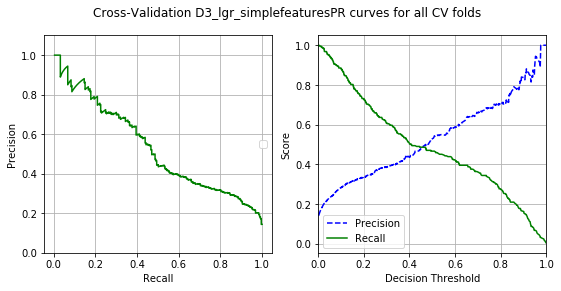

In [24]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 6)

No handles with labels found to put in legend.


INPUT DATA
FEATURES:51
TRAINING SAMPLES: 2222
CLASS 1 PROPORTION: 0.13
CV RESULTS
average_precision
TRAIN MEAN (std):  0.618 ( 0.028 )
VALID MEAN (std):  0.609 ( 0.046 )
DIFF BETWEEN MEAN:  0.010
briers_score_loss
TRAIN MEAN (std):  0.087 ( 0.008 )
VALID MEAN (std):  0.100 ( 0.037 )
DIFF BETWEEN MEAN:  -0.013


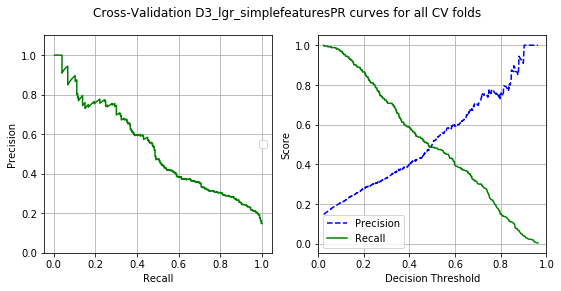

In [28]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 6)

In [28]:
break

SyntaxError: 'break' outside loop (<ipython-input-28-6aaf1f276005>, line 4)

In [1]:
import pickle
filename = '../../../data/output/HighDimModelLGR_EDmornEDocc.pkl'

outfile = open(filename,'wb')
pickle.dump(meval,outfile)
outfile.close()

NameError: name 'meval' is not defined